<a href="https://colab.research.google.com/github/MedulHasan/Thesis/blob/master/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader as web
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
'''import io
from google.colab import files
uploaded = files.upload()'''

'import io\nfrom google.colab import files\nuploaded = files.upload()'

In [3]:
#df = web.DataReader('TM', data_source='yahoo', start='2012-01-01', end='2019-12-17')
csv_file = 'aci_data.csv'
df = pd.read_csv(csv_file)
df

,SL NO,Date,TRADING CODE,Close,YCP*
0,1,6/30/2020,ACI,204.2,200.8
1,2,6/29/2020,ACI,200.8,197.6
2,3,6/28/2020,ACI,197.6,193.1
3,4,6/25/2020,ACI,193.1,192.5
4,5,6/24/2020,ACI,192.5,192.4
...,...,...,...,...,...
419,420,7/31/2018,ACI,363.0,363.3
420,421,7/30/2018,ACI,363.3,371.0
421,422,7/29/2018,ACI,371.0,377.6
422,423,7/26/2018,ACI,377.6,369.0


In [4]:
#number of rows and columns
df.shape

(424, 5)

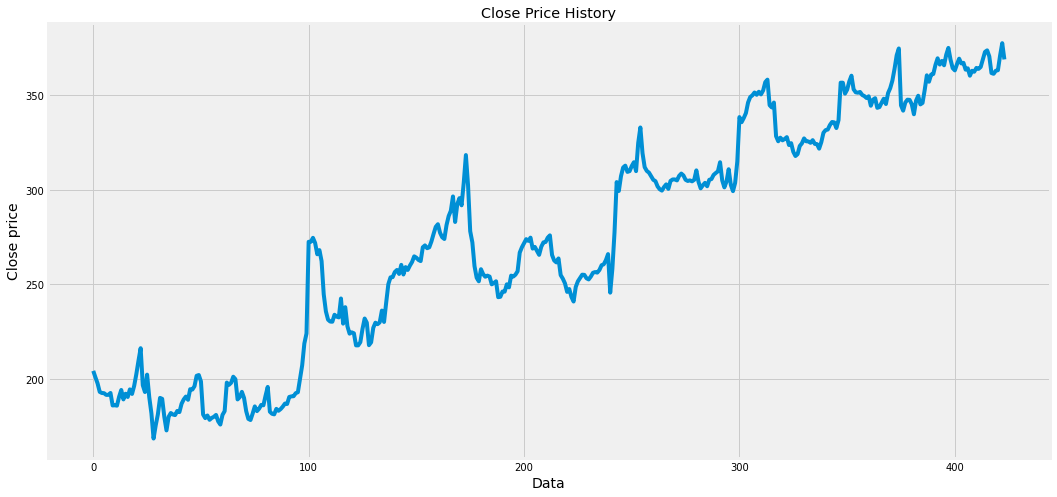

In [5]:
#visulize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=14)
plt.ylabel(('Close price'), fontsize=14)
plt.show()

In [6]:
#create a new dataframe with close_price
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#dataset

#get the number of row to train the model
train_data_len = math.ceil(len(dataset) * 0.8)
train_data_len

340

In [7]:
#scale tha data
'''calculate min_max_scaler formula =  "(x_i - x_min) / (x_max - x_min)"     '''
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

In [8]:
#training data set
#creat the scaled training data set
train_data = scaled_data[0:train_data_len, :]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<=31:
    print(x_train)
    print(y_train)
    print()

[array([0.17112811, 0.15487572, 0.13957935, 0.11806883, 0.11520076,
       0.11472275, 0.11042065, 0.11042065, 0.11520076, 0.08365201,
       0.08413002, 0.083174  , 0.10564054, 0.12284895, 0.09894837,
       0.11328872, 0.10516252, 0.12428298, 0.11281071, 0.1333652 ,
       0.16300191, 0.19694073, 0.22848948, 0.13479924, 0.11759082,
       0.16156788, 0.10468451, 0.06357553, 0.        , 0.0334608 ])]
[0.06118546845124273]

[array([0.17112811, 0.15487572, 0.13957935, 0.11806883, 0.11520076,
       0.11472275, 0.11042065, 0.11042065, 0.11520076, 0.08365201,
       0.08413002, 0.083174  , 0.10564054, 0.12284895, 0.09894837,
       0.11328872, 0.10516252, 0.12428298, 0.11281071, 0.1333652 ,
       0.16300191, 0.19694073, 0.22848948, 0.13479924, 0.11759082,
       0.16156788, 0.10468451, 0.06357553, 0.        , 0.0334608 ]), array([0.15487572, 0.13957935, 0.11806883, 0.11520076, 0.11472275,
       0.11042065, 0.11042065, 0.11520076, 0.08365201, 0.08413002,
       0.083174  , 0.10564054, 0.

In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(310, 30, 1)

In [11]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)#

Epoch 1/1
310/310 [==============================] - 10s 34ms/step - loss: 0.0112


In [14]:
#create the testing data
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[train_data_len - 30:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [15]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

1.0756367274693066

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


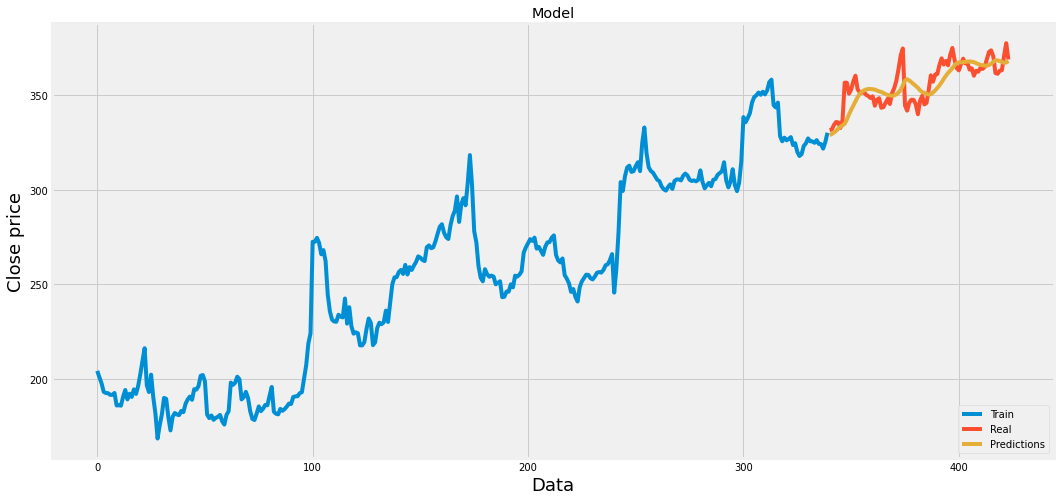

In [19]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions']  = predictions
#visualized the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real', 'Predictions'], loc = 'lower right')
plt.show()

In [20]:
#show the valid and predicted price
valid

,Close,Predictions
340,331.6,328.928467
341,331.9,329.543030
342,334.3,330.289276
343,335.9,331.220856
344,335.7,332.291565
...,...,...
419,363.0,368.145142
420,363.3,367.695160
421,371.0,367.245422
422,377.6,367.356750
